## Dependencies

In [1]:
# Data Management
import pickle
#import datetime as dt

In [2]:
# Data manipulation dependencies
#import math
import statistics
#import scipy.stats
#import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Custom data handling methods
import prep_IO

In [4]:
# Directory of pre-determined lustre failed jobs
src = './lustre_set.pkl'

In [5]:
search_raw = pickle.load( open( src, "rb" ) )
search_set = [ item for item in search_raw if '2020-09' not in item[1] and '2020-10' not in item[1] ]

#### Generate sample data

In [6]:
sample_n = 2
#sample_info = prep_IO.search_sample_n( search_set, sample_n )
sample_info = {'Sample': [('comet-14-71',
   '2020-05-27T01:47:29',
   '2020-05-27T05:30:13',
   '33659176'),
  ('comet-12-13', '2020-05-12T08:24:41', '2020-05-13T10:00:45', '33283684')],
 'Raw': {('comet-14-71',
   '2020-05-27T01:47:29',
   '2020-05-27T05:30:13',
   '33659176'): {'Source': ['/oasis/projects/nsf/sys200/stats/xsede_stats/archive/comet-14-71.sdsc.edu/1590505171.gz'],
   'Single JobID': False},
  ('comet-12-13',
   '2020-05-12T08:24:41',
   '2020-05-13T10:00:45',
   '33283684'): {'Source': ['/oasis/projects/nsf/sys200/stats/xsede_stats/archive/comet-12-13.sdsc.edu/1589290650.gz',
    '/oasis/projects/nsf/sys200/stats/xsede_stats/archive/comet-12-13.sdsc.edu/1589377050.gz'], 'Single JobID': False}},
 'Out': {('comet-14-71',
   '2020-05-27T01:47:29',
   '2020-05-27T05:30:13',
   '33659176'): {'Source': ['/oasis/projects/nsf/sys200/stats/xsede_stats/archive/comet-14-71.sdsc.edu/1590505171.gz'],
   'Single JobID': False},
  ('comet-12-13',
   '2020-05-12T08:24:41',
   '2020-05-13T10:00:45',
   '33283684'): {'Source': ['/oasis/projects/nsf/sys200/stats/xsede_stats/archive/comet-12-13.sdsc.edu/1589290650.gz',
    '/oasis/projects/nsf/sys200/stats/xsede_stats/archive/comet-12-13.sdsc.edu/1589377050.gz'], 'Single JobID': False}}}

In [7]:
# setup friendly keys and fill in search results
keys = list(sample_info["Out"].keys())
sample_hosts = prep_IO.fill_host_info( sample_info )
sample_accts = prep_IO.fill_acct_info( sample_info, keys )

In [8]:
sample_accts

{('comet-14-71',
  '2020-05-27T01:47:29',
  '2020-05-27T05:30:13',
  '33659176'): {'JobID': '33659176', 'Start': '2020-05-27T01:47:29', 'End': '2020-05-27T05:30:13', 'Submit': '2020-05-26T18:22:46', 'Partition': 'compute', 'Timelimit': '2-00:00:00', 'State': 'FAILED', 'NNodes': '8', 'ReqCPUS': '64', 'NodeList\n': 'comet-06-56,comet-07-14,comet-11-24,comet-14-71,comet-15-34,comet-20-[09,53],comet-22-30\n', 'Source': ['/oasis/projects/nsf/sys200/stats/xsede_stats/archive/comet-14-71.sdsc.edu/1590505171.gz'], 'Single JobID': False},
 ('comet-12-13',
  '2020-05-12T08:24:41',
  '2020-05-13T10:00:45',
  '33283684'): {'JobID': '33283684', 'Start': '2020-05-12T08:24:41', 'End': '2020-05-13T10:00:45', 'Submit': '2020-05-11T10:37:35', 'Partition': 'compute', 'Timelimit': '1-23:59:00', 'State': 'FAILED', 'NNodes': '4', 'ReqCPUS': '96', 'NodeList\n': 'comet-12-[13,28,30,39]\n', 'Source': ['/oasis/projects/nsf/sys200/stats/xsede_stats/archive/comet-12-13.sdsc.edu/1589290650.gz',
   '/oasis/projects

## Data

1. Size
2. Missingness
3. Shape
4. Central Tendency
5. Variability

- first level keys: search labels
- second level keys: ['Acct Info', 'Host Info', 'Source Files']
- 'Host Info' keys: ['Timely Data', 'Schemas', 'Specs']


In [9]:
# Token search from file lines
#lines = prep_IO.unzip_txt( check["Source"][0] )
#token = 'ps'
#
#for line in lines:
#    if token in line:
#        print(line)

### Preview Sample

In [10]:
sample_info["Sample"]

[('comet-14-71', '2020-05-27T01:47:29', '2020-05-27T05:30:13', '33659176'),
 ('comet-12-13', '2020-05-12T08:24:41', '2020-05-13T10:00:45', '33283684')]

In [11]:
sample_tar = keys[0]
sample_accts[ sample_tar ]

{'JobID': '33659176',
 'Start': '2020-05-27T01:47:29',
 'End': '2020-05-27T05:30:13',
 'Submit': '2020-05-26T18:22:46',
 'Partition': 'compute',
 'Timelimit': '2-00:00:00',
 'State': 'FAILED',
 'NNodes': '8',
 'ReqCPUS': '64',
 'NodeList\n': 'comet-06-56,comet-07-14,comet-11-24,comet-14-71,comet-15-34,comet-20-[09,53],comet-22-30\n',
 'Source': ['/oasis/projects/nsf/sys200/stats/xsede_stats/archive/comet-14-71.sdsc.edu/1590505171.gz'],
 'Single JobID': False}

In [12]:
sample_hosts[ sample_tar ][ "Specs" ]

['tacc_stats 2.3.4',
 'hostname comet-14-71.sdsc.edu',
 'uname Linux x86_64 3.10.0-957.12.2.el7.x86_64 #1 SMP Tue May 14 21:24:32 UTC 2019',
 'uptime 2937699']

In [13]:
sample_hosts[ sample_tar ][ "Source" ]

['/oasis/projects/nsf/sys200/stats/xsede_stats/archive/comet-14-71.sdsc.edu/1590505171.gz']

In [14]:
sample_hosts[ sample_tar ][ "Single JobID" ]

False

## Plot stuff

plot templates

In [15]:
## Histogram
##hist, bin_edges = np.histogram(x, bins=10)
#fig, ax = plt.subplots()
#ax.hist(x, bin_edges, cumulative=False)
#ax.set_xlabel('x')
#ax.set_ylabel('Frequency')
#plt.show()
#
## Pie Chart
## x, y, z = 128, 256, 1024
#fig, ax = plt.subplots()
#ax.pie((x, y, z), labels=('x', 'y', 'z'), autopct='%1.1f%%')
#plt.show()
#
## Horizontal Bar Chart
##x = np.arange(21)
##y = np.random.randint(21, size=21)
##err = np.random.randn(21)
#fig, ax = plt.subplots())
#ax.bar(x, y, yerr=err)
#ax.set_xlabel('x')
#ax.set_ylabel('y')
#plt.show()
#
## Scatterplot w/ Line
##x = np.arange(21)
##y = 5 + 2 * x + 2 * np.random.randn(21)
##slope, intercept, r, *__ = scipy.stats.linregress(x, y)
##line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
#fig, ax = plt.subplots()
#ax.plot(x, y, linewidth=0, marker='s', label='Data points')
#ax.plot(x, intercept + slope * x, label=line)
#ax.set_xlabel('x')
#ax.set_ylabel('y')
#ax.legend(facecolor='white')
#plt.show()
#
## Seaborn heatmap w/ 2 var
##Index= ['aaa', 'bbb', 'ccc', 'ddd', 'eee']
##Cols = ['A', 'B', 'C', 'D']
##data = abs(np.random.randn(5, 4))
##df = DataFrame(data, index=Index, columns=Cols)
#sns.heatmap(df, annot=True)

In [16]:
# SAVE template
#save_thing = test_dict
#f = open("save_thing_name.pkl","wb")
#pickle.dump( save_thing,f )
#f.close()

# read in search_out from saved dict in src_file
#save_thing = pickle.load( open( "save_thing_name.pkl", "rb" ) )
#keys = list(save_thing.keys())
#len(keys)

# Analysis

#### Setup Structures

GOAL:
Format data for a visualization with X-axis as time, y-axis as cat value, and each cat as a plotted line

In [17]:
# All valid 'Timely Data' occurences in dataset
data_lists = [ sample_hosts[key]['Data'] for key in keys ]

# friendlllyy data
df_a = pd.DataFrame( data_lists[0] )
df_b = pd.DataFrame( data_lists[1] )

# timelines for each
times_a = list( df_a[4].unique() )
times_b = list( df_b[4].unique() )

#### Identify Variable behavior

In [18]:
target = data_lists[0]

In [19]:
timedata_by_label = prep_IO.labeled_data( target )
timedata_keys = list( timedata_by_label.keys() )

In [20]:
cat_counts = { key:len(value) for key,value in timedata_by_label.items() }
base = statistics.mode( cat_counts.values() )

std_cats = []
irreg_cats = []

for cat,count in cat_counts.items():
    if count != base:
        if cat not in irreg_cats:
            irreg_cats.append( cat )
    else:
        if cat not in std_cats:
            std_cats.append( cat )
            
    #print( f"{cat} recorded {count} times." )

### General Descriptive Statistics

Data manipulation:
* If host recorded value at `t_0` and increased with each `t_i`, record base value and decrease each `t_i` by base value before performing descriptive operations
    * Certain categories record values that do not necessarily reset between jobs.
* If all `t_i` represent same value, move category to "Static" and do not include in descriptive operations
* `std_cats` appear for each `t_i`
* `irreg_cats` appear sporadically throughout run

In [21]:
descriptives = prep_IO.get_host_descriptives( timedata_by_label, timedata_keys )
std_desc = { key:value for key,value in descriptives.items() if key in std_cats }
irr_desc = { key:value for key,value in descriptives.items() if key in irreg_cats }
static_cats = descriptives["Static"]
n_static = len(static_cats)

#prep_IO.quick_save( descriptives, label='lustre_set_descriptives' )

In [22]:
print( f"Static categories:\t { n_static }")
print( f"Unique categories:\t {len(descriptives) - 1}" )
print( f"\tStandard:\t { len(std_desc) }")
print( f"\tIrregular:\t { len(irr_desc) }")

Static categories:	 907
Unique categories:	 626
	Standard:	 574
	Irregular:	 52


## Graphs

In [23]:
std_keys = list(std_desc.keys())

In [24]:
nice_times = [ prep_IO.get_time( t_i )[11:-3]+'A' for t_i in times_a ]
ts = [ 't'+str(i) for i in range( len(nice_times) ) ]
y_data = std_desc[ std_keys[1] ]["Values"]

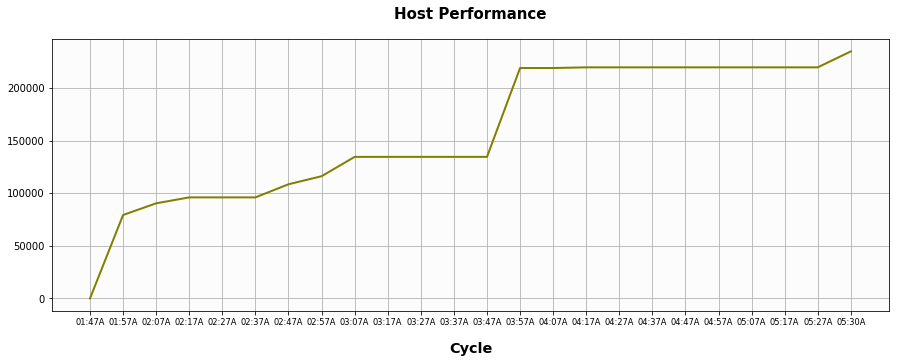

In [25]:
# Setup top graph
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
#ax1.plot(ts, y_data_a, marker='.', markersize=5.0, linewidth=2.0, color="black", alpha=0.6)
ax1.plot(ts, y_data, marker='', color='olive', linewidth=2)
plt.grid( True )

# Label graphs
#      Top graph
ax1.set_xticklabels( labels=nice_times, fontsize='small' )
ax1.set_title( label=f"Host Performance", pad=20, fontdict={'fontweight': 'bold', 'fontsize': 15} )
ax1.set_xlabel( "Cycle", labelpad=15, fontweight='bold', fontsize='x-large' )
#ax1.set_ylabel( "Performance", labelpad=15, fontweight='bold', fontsize='x-large' )

# Fill graph backgrounds
ax1.set_facecolor( '0.99' )

# Setup spacing of graphs
plt.gcf().set_size_inches(15, 11)

# Save figure as .png
#plt.savefig( f"./{std_cats_target}.png", bbox='tight')

In [84]:
temp_dict = { f'y{i}': std_desc[ std_keys[i] ][ "Values" ] for i in range(len(std_keys)) }
ys = list(temp_dict.keys())

part = ys[100:110]

graph_df_full = pd.DataFrame( temp_dict )
graph_df = graph_df_full[[ y for y in part ]]

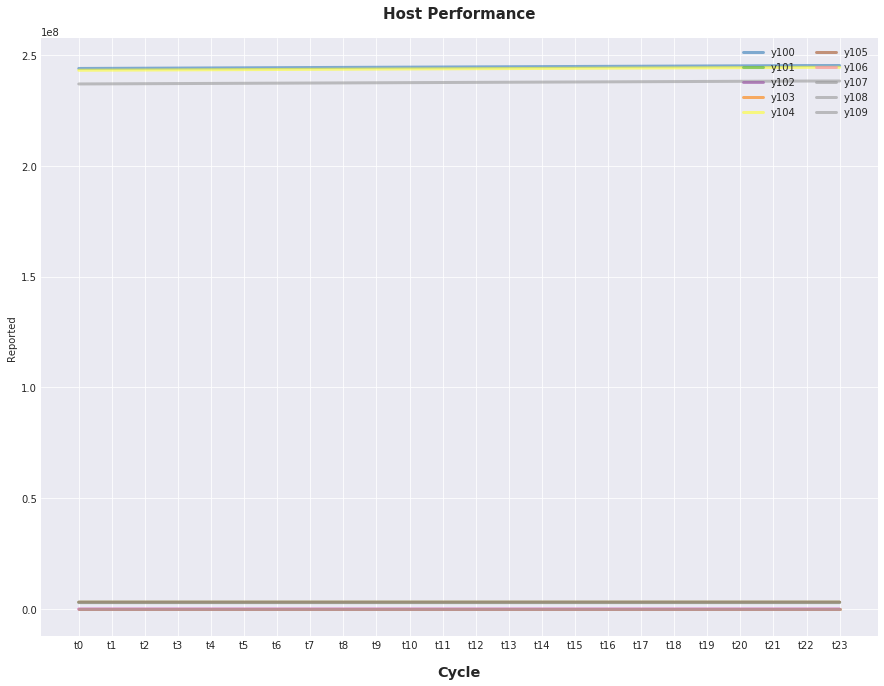

In [86]:
# style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num = 0
for column in graph_df:
    num += 1
    plt.plot( ts, graph_df[ column ],
              marker='', color=palette( num ), linewidth=3, alpha=0.6,
              label=column
            )
 
#
plt.legend(loc='upper right', ncol=2)
 
# Add titles
plt.title(label=f"Host Performance", pad=20, fontdict={'fontweight': 'bold', 'fontsize': 15})
plt.xlabel("Cycle", labelpad=15, fontweight='bold', fontsize='x-large')
plt.ylabel("Reported")

# Fill graph backgrounds
ax1.set_facecolor( '0.99' )

# Setup spacing of graphs
plt.gcf().set_size_inches(15, 11)

In [87]:
focal = ['y3','y10', 'y25', 'y29', 'y31', 'y33', 'y37',
         'y43', 'y48', 'y53', 'y57', 'y62', 'y75', 'y84',
         'y88', 'y92','y96', 'y104','', '','', '',
         '', '','', '','', '',]